# ML Linear Regression

This kernel is based on Tech with Tim's YouTube Channel.

https://www.youtube.com/watch?v=45ryDIPHdGg
    
Dataset from https://archive.ics.uci.edu/ml/datasets.php    

## What is linear regression?

* Regression is a method of modelling a target value based on independent predictors. 
* This method is mostly used for forecasting and finding out cause and effect relationship between variables.
* Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

<img src = https://mlfromscratch.com/content/images/2020/01/linearRegression2-3.png width = 500>

More information on linear regression can be found in this [Medium Article.](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)

# In this kernel, we will be looking at a dataset with certain features if it can predict a student's grade.

In [5]:
# Importing libraries

# Data analysis
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Machine learning
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [6]:
# Reading the data

data = pd.read_csv('student-mat.csv', sep=';')

data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]  # attributes

# G1 is the grades achieved in term 1, G2 is the grades achieved in term 2, G3 is the final grade which is our target.

data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


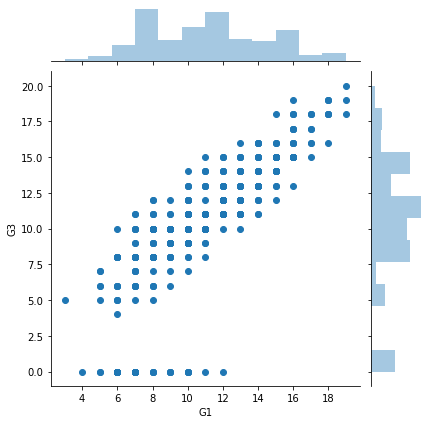

In [8]:
# Plotting the data to see what it looks like

sns.jointplot(data=data, y='G3', x='G1')

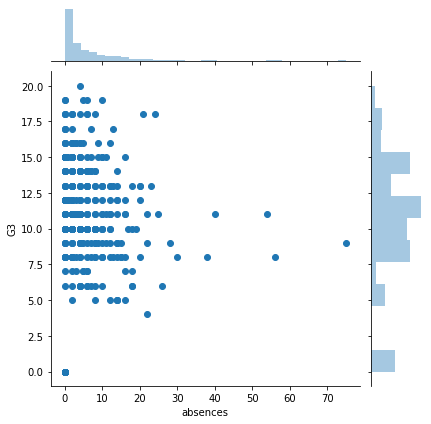

In [9]:
sns.jointplot(data=data, y='G3', x='absences')

In [10]:
# Correlation between parameters

print(data.corr())

                 G1        G2        G3  studytime  failures  absences
G1         1.000000  0.852118  0.801468   0.160612 -0.354718 -0.031003
G2         0.852118  1.000000  0.904868   0.135880 -0.355896 -0.031777
G3         0.801468  0.904868  1.000000   0.097820 -0.360415  0.034247
studytime  0.160612  0.135880  0.097820   1.000000 -0.173563 -0.062700
failures  -0.354718 -0.355896 -0.360415  -0.173563  1.000000  0.063726
absences  -0.031003 -0.031777  0.034247  -0.062700  0.063726  1.000000


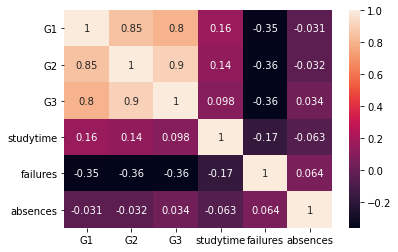

In [11]:
sns.heatmap(data.corr(), annot=True)

In [12]:
#print(data.head())

predict = 'G3' # label for attributes

x = np.array(data.drop([predict], 1)) 
y = np.array(data[predict])

# Machine Learning

In [50]:
# Split the data into 4 different arrays
# This section can be removed if loading the model

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1, random_state=1) # split 10 percent of data into test samples

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train) # fits the data to find a best fit line for linear regression
acc = linear.score(x_test, y_test)
print('Acc: \n', acc)
print('Co: \n', linear.coef_) # m value in y=mx+c
print('Intercept: \n', linear.intercept_)

Acc: 
 0.8195461299548163
Co: 
 [ 0.16993715  0.97017613 -0.19561695 -0.26930702  0.03548832]
Intercept: 
 -1.5631015481529182


# Saving the model
* Save the model in pickle format so that re-training isn't required - saves time for large repetitions of training
* Save the highest scoring model

In [51]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)

# Loading the model

In [13]:
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

# Predict grade with test data, validation

In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1, random_state=1) # split 10 percent of data into test samples
predictions = linear.predict(x_test)

In [16]:
for x in range (len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) # Predicted value, attributes, actual value

5.025554275365043 [6 7 2 3 0] 0
10.100082499170002 [10 10  2  0 17] 10
6.826789473724615 [ 6  8  1  3 16] 8
8.817276977307413 [9 9 1 0 8] 10
9.795885663336655 [11 10  1  0  0] 10
11.259066106850504 [12 11  1  1 16] 12
7.611172797990832 [ 9  8  2  1 15] 8
12.371794340256166 [14 12  1  0  4] 11
11.848208511786439 [11 12  1  0  2] 11
7.00115858103514 [9 8 4 0 2] 8
12.402734350058733 [14 12  2  0 10] 11
14.62340495648506 [15 14  2  1 20] 13
6.1765703715729625 [ 6  7  2  1 15] 8
7.370108670945282 [5 9 2 2 6] 7
8.315460029203518 [8 9 2 0 4] 10
10.882197576686295 [13 11  2  0  0] 10
15.515014666773961 [15 15  2  0 10] 15
16.284531993361156 [14 16  1  0  3] 16
5.838083450167669 [7 7 3 0 0] 8
9.524358367786256 [10 10  2  0  2] 10
11.155454402717076 [12 11  2  0 11] 11
18.53391903757827 [18 18  3  0  5] 19
9.303239844669493 [ 8 10  2  0  4] 10
12.037260521343038 [10 12  2  0 16] 11
15.426224285581409 [16 15  3  0  9] 16
4.361978774633026 [ 6  5  1  1 14] 5
11.03572401172196 [13 11  2  0  4] 11
8

# Using the best model

In [68]:
best = 0
for _ in range(30): # Repeats up to 30 times to find the best accuracy value score
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print('Acc:', acc)
    
    # Saves the overall best accuracy
    if acc > best: 
        best = acc
        with open('studentmodel.pickle', 'wb') as f:
            pickle.dump(linear, f)
            print (acc)

Acc: 0.6766654773829215
0.6766654773829215
Acc: 0.8975433684725419
0.8975433684725419
Acc: 0.9075761383617268
0.9075761383617268
Acc: 0.7052647272762789
Acc: 0.8710160478283665
Acc: 0.9058852608623742
Acc: 0.8879946254746902
Acc: 0.9538208710643694
0.9538208710643694
Acc: 0.7386784067020971
Acc: 0.6986616380599112
Acc: 0.851505279730894
Acc: 0.8595995161901916
Acc: 0.804298925273073
Acc: 0.7996912916085357
Acc: 0.8280517817152739
Acc: 0.888399238940604
Acc: 0.7229794266211902
Acc: 0.7579077345164822
Acc: 0.877740116011593
Acc: 0.9050015827864911
Acc: 0.8026652033292125
Acc: 0.8796722523863332
Acc: 0.8755472808694902
Acc: 0.6840747265932186
Acc: 0.7997312022929378
Acc: 0.8370004376189873
Acc: 0.7800491033001626
Acc: 0.8296381947458857
Acc: 0.8099245660959794
Acc: 0.7871551942655672


In [17]:
# Then you can load the best model

pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

# Plotting the data

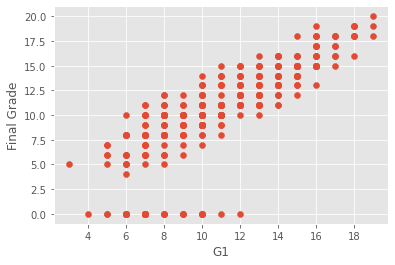

In [18]:
p = 'G1'
style.use('ggplot')
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel('Final Grade')
plt.show()

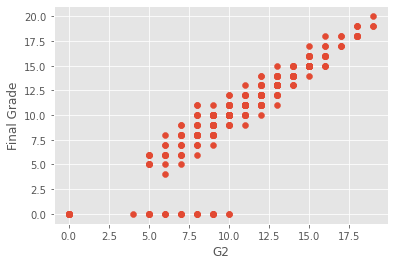

In [80]:
p = 'G2'
style.use('ggplot')
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel('Final Grade')
plt.show()

# There is a lot more to linear regression than a simple line. If there is overfitting of the data (which normally happens in real data), regularization is used alongside linear regression which is ridge and lasso regression, to help reduce the overfitting of the training data.

More information can be found here: https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a